<a href="https://colab.research.google.com/github/alvesmaurosan-png/MSEP_PLIM/blob/main/MSEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pulp

import pulp as plp

# --- DADOS DO MODELO PARA CADA ITINERÁRIO ---

dados = {
    1: {  # Itinerário 1: Concepção de Projetos e Engenharia 4.0
        "nome": "Concepção de Projetos",
        "modulos": ["M1_Digitalizacao", "M2_Sustentabilidade", "M3_DigitalTwin"],
        "cargas_horarias": {"M1_Digitalizacao": 40, "M2_Sustentabilidade": 40, "M3_DigitalTwin": 30},
        "carga_horaria_max": 110,
        "competencias": ["logica_matematica", "uso_cad_cae", "otimizacao_topologica", "criatividade", "colaboracao"],
        "relevancia_competencias": {"logica_matematica": 5, "uso_cad_cae": 10, "otimizacao_topologica": 9, "criatividade": 8, "colaboracao": 7},
        "contribuicao_modulos": {
            "M1_Digitalizacao": {"logica_matematica": 0.8, "uso_cad_cae": 1.0, "otimizacao_topologica": 0.5, "criatividade": 0.7, "colaboracao": 0.5},
            "M2_Sustentabilidade": {"logica_matematica": 0.9, "uso_cad_cae": 0.6, "otimizacao_topologica": 0.8, "criatividade": 0.6, "colaboracao": 0.8},
            "M3_DigitalTwin": {"logica_matematica": 0.7, "uso_cad_cae": 0.7, "otimizacao_topologica": 0.4, "criatividade": 0.8, "colaboracao": 0.9}
        }
    },
    2: {  # Itinerário 2: Manufatura e Produção 4.0
        "nome": "Manufatura e Produção",
        "modulos": ["M1_Robotica", "M2_Manutencao_Preditiva", "M3_Otimizacao_MILP"],
        "cargas_horarias": {"M1_Robotica": 50, "M2_Manutencao_Preditiva": 40, "M3_Otimizacao_MILP": 30},
        "carga_horaria_max": 120,
        "competencias": ["programacao_robotica", "manutencao_preditiva", "raciocinio_quantitativo", "melhoria_continua", "trabalho_em_equipe"],
        "relevancia_competencias": {"programacao_robotica": 9, "manutencao_preditiva": 9, "raciocinio_quantitativo": 8, "melhoria_continua": 6, "trabalho_em_equipe": 7},
        "contribuicao_modulos": {
            "M1_Robotica": {"programacao_robotica": 1.0, "manutencao_preditiva": 0.3, "raciocinio_quantitativo": 0.7, "melhoria_continua": 0.5, "trabalho_em_equipe": 0.8},
            "M2_Manutencao_Preditiva": {"programacao_robotica": 0.2, "manutencao_preditiva": 1.0, "raciocinio_quantitativo": 0.9, "melhoria_continua": 0.9, "trabalho_em_equipe": 0.6},
            "M3_Otimizacao_MILP": {"programacao_robotica": 0.5, "manutencao_preditiva": 0.7, "raciocinio_quantitativo": 1.0, "melhoria_continua": 0.8, "trabalho_em_equipe": 0.7}
        }
    },
    3: {  # Itinerário 3: Logística e Supply Chain
        "nome": "Logística e Supply Chain",
        "modulos": ["M1_Rastreabilidade", "M2_Logistica_Reversa"],
        "cargas_horarias": {"M1_Rastreabilidade": 40, "M2_Logistica_Reversa": 50},
        "carga_horaria_max": 90,
        "competencias": ["raciocinio_quantitativo", "analise_de_dados", "uso_erp_blockchain", "visao_sistemica", "responsabilidade_social"],
        "relevancia_competencias": {"raciocinio_quantitativo": 8, "analise_de_dados": 8, "uso_erp_blockchain": 10, "visao_sistemica": 9, "responsabilidade_social": 7},
        "contribuicao_modulos": {
            "M1_Rastreabilidade": {"raciocinio_quantitativo": 0.7, "analise_de_dados": 0.8, "uso_erp_blockchain": 1.0, "visao_sistemica": 0.9, "responsabilidade_social": 0.6},
            "M2_Logistica_Reversa": {"raciocinio_quantitativo": 0.9, "analise_de_dados": 0.9, "uso_erp_blockchain": 0.7, "visao_sistemica": 1.0, "responsabilidade_social": 1.0}
        }
    },
    4: {  # Itinerário 4: Serviços e Pós-Venda em Veículos Eletrificados
        "nome": "Serviços e Pós-Venda",
        "modulos": ["M1_Alta_Tensao", "M2_Diagnostico_VAC"],
        "cargas_horarias": {"M1_Alta_Tensao": 60, "M2_Diagnostico_VAC": 50},
        "carga_horaria_max": 110,
        "competencias": ["seguranca_eletrica", "diagnostico_digital", "comunicacao_eficaz", "atencao_concentrada", "adaptabilidade"],
        "relevancia_competencias": {"seguranca_eletrica": 10, "diagnostico_digital": 9, "comunicacao_eficaz": 7, "atencao_concentrada": 8, "adaptabilidade": 8},
        "contribuicao_modulos": {
            "M1_Alta_Tensao": {"seguranca_eletrica": 1.0, "diagnostico_digital": 0.7, "comunicacao_eficaz": 0.5, "atencao_concentrada": 1.0, "adaptabilidade": 0.6},
            "M2_Diagnostico_VAC": {"seguranca_eletrica": 0.6, "diagnostico_digital": 1.0, "comunicacao_eficaz": 0.8, "atencao_concentrada": 0.7, "adaptabilidade": 1.0}
        }
    },
    5: {  # Itinerário 5: Fim de Vida e Economia Circular
        "nome": "Fim de Vida e Economia Circular",
        "modulos": ["M1_Desmontagem_Materiais", "M2_Reciclagem_Baterias"],
        "cargas_horarias": {"M1_Desmontagem_Materiais": 40, "M2_Reciclagem_Baterias": 60},
        "carga_horaria_max": 100,
        "competencias": ["gestao_ambiental", "reciclagem_materiais", "consciencia_ambiental", "resolucao_problemas_tecnicos", "etica"],
        "relevancia_competencias": {"gestao_ambiental": 8, "reciclagem_materiais": 10, "consciencia_ambiental": 9, "resolucao_problemas_tecnicos": 9, "etica": 8},
        "contribuicao_modulos": {
            "M1_Desmontagem_Materiais": {"gestao_ambiental": 0.9, "reciclagem_materiais": 0.7, "consciencia_ambiental": 1.0, "resolucao_problemas_tecnicos": 0.7, "etica": 0.8},
            "M2_Reciclagem_Baterias": {"gestao_ambiental": 0.8, "reciclagem_materiais": 1.0, "consciencia_ambiental": 0.9, "resolucao_problemas_tecnicos": 1.0, "etica": 0.9}
        }
    }
}

NIVEL_MINIMO_PROFICIENCIA = 1.5

def otimizar_itinerario(itinerario_id):
    itinerario = dados[itinerario_id]
    nome_itinerario = itinerario["nome"]
    modulos = itinerario["modulos"]
    competencias = itinerario["competencias"]
    cargas_horarias = itinerario["cargas_horarias"]
    carga_horaria_max = itinerario["carga_horaria_max"]
    relevancia = itinerario["relevancia_competencias"]
    contribuicao = itinerario["contribuicao_modulos"]

    # 1. Criação do problema
    problema = plp.LpProblem(f"Otimizacao_{nome_itinerario}", plp.LpMaximize)

    # 2. Variáveis de decisão
    X = plp.LpVariable.dicts("Modulo", modulos, 0, 1, plp.LpBinary)
    Y = plp.LpVariable.dicts("Competencia", competencias, 0, 1, plp.LpBinary)

    # 3. Função Objetivo
    problema += plp.lpSum([relevancia[c] * Y[c] for c in competencias]), "Pontuacao Total de Competencias"

    # 4. Restrições
    # Restrição de Carga Horária Total
    problema += plp.lpSum([cargas_horarias[m] * X[m] for m in modulos]) <= carga_horaria_max, "Carga Horaria Total"

    # Restrição de Aquisição de Competência (Nível Mínimo de Proficiência)
    for c in competencias:
        problema += plp.lpSum([contribuicao[m][c] * X[m] for m in modulos]) >= Y[c] * NIVEL_MINIMO_PROFICIENCIA, f"Competencia_{c}_Adquirida"

    # Restrições de Pré-requisito (Exemplo para o Itinerário 2)
    if itinerario_id == 2:
        # O Módulo de Otimização (M3) depende do de Robótica (M1) e Manutenção (M2)
        problema += X["M3_Otimizacao_MILP"] <= X["M1_Robotica"], "Pre-requisito_1"
        problema += X["M3_Otimizacao_MILP"] <= X["M2_Manutencao_Preditiva"], "Pre-requisito_2"

    # Solução do problema
    status = problema.solve()

    # Apresentação dos resultados
    print(f"\n--- RESULTADOS PARA O ITINERÁRIO: {nome_itinerario} ---")
    print(f"Status: {plp.LpStatus[status]}")
    print(f"Pontuação Máxima de Competências: {plp.value(problema.objective):.2f}")
    print("\nMódulos Selecionados:")
    for m in modulos:
        if X[m].varValue == 1:
            print(f"- {m}: {cargas_horarias[m]} horas")
    print("\nCompetências Adquiridas (com pontuação):")
    for c in competencias:
        if Y[c].varValue == 1:
            print(f"- {c}: {relevancia[c]}")
    print("--------------------------------------------------\n")

if __name__ == "__main__":
    for i in range(1, 6):
        otimizar_itinerario(i)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 70.7 MB/s eta 0:00:00

--- RESULTADOS PARA O ITINERÁRIO: Concepção de Projetos ---
Status: Optimal
Pontuação Máxima de Competências: 39.00

Módulos Selecionados:
- M1_Digitalizacao: 40 horas
- M2_Sustentabilidade: 40 horas
- M3_DigitalTwin: 30 horas

Competências Adquiridas (com pontuação):
- logica_matematica: 5
- uso_cad_cae: 10
- otimizacao_topologica: 9
- criatividade: 8
- colaboracao: 7
--------------------------------------------------


--- RESULTADOS PARA O ITINERÁRIO: Manufatura e Produção ---
Status: Optimal
Pontuação Máxima de Competências: 39.00

Módulos Selecionados:
- M1_Robotica: 50 horas
- M2_Manutencao_Preditiva: 40 horas
- M3_Otimizacao_MILP: 30 horas

Competências Adquiridas (com pontuação):
- programacao_robotica: 9
- manutencao_preditiva: 9
- raciocinio_quantitativo: 8
- melhoria_continua: 6
- trabalho_em_equipe: 7
--------------------------------------------------


--- RESULTADOS PARA O ITINERÁRIO: Logístic

/usr/local/lib/python3.12/dist-packages/pulp/pulp.py:1489: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


$$
\text{Maximizar } \sum_{c \in \text{Capacidades}} \text{relevancia}_c \cdot Y_c
$$

Onde:
- $c$: representa uma capacidade específica.
- $\text{relevancia}_c$: é a relevância atribuída à capacidade $c$.
- $Y_c$: é uma variável de decisão binária que é 1 se a capacidade $c$ for adquirida e 0 caso contrário.


--- RESULTADOS PARA O ITINERÁRIO: Concepção de Projetos ---
Status: Optimal
Pontuação Máxima de Competências: 39.00

Módulos Selecionados:
- M1_Digitalizacao: 40 horas
- M2_Sustentabilidade: 40 horas
- M3_DigitalTwin: 30 horas

Competências Adquiridas (com pontuação):
- logica_matematica: 5
- uso_cad_cae: 10
- otimizacao_topologica: 9
- criatividade: 8
- colaboracao: 7
--------------------------------------------------



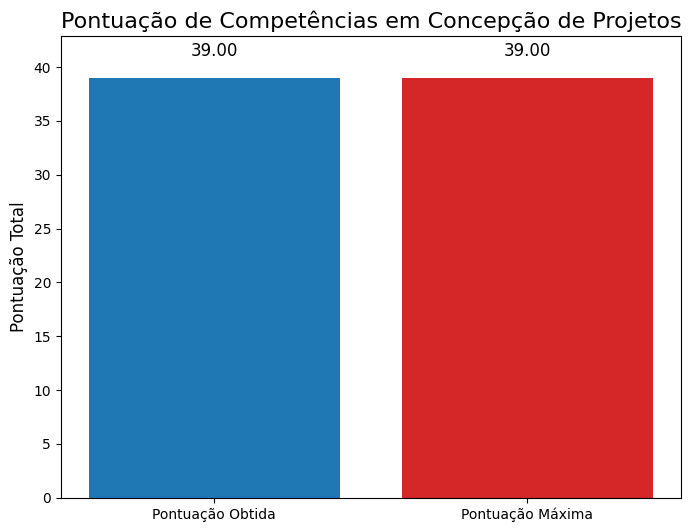

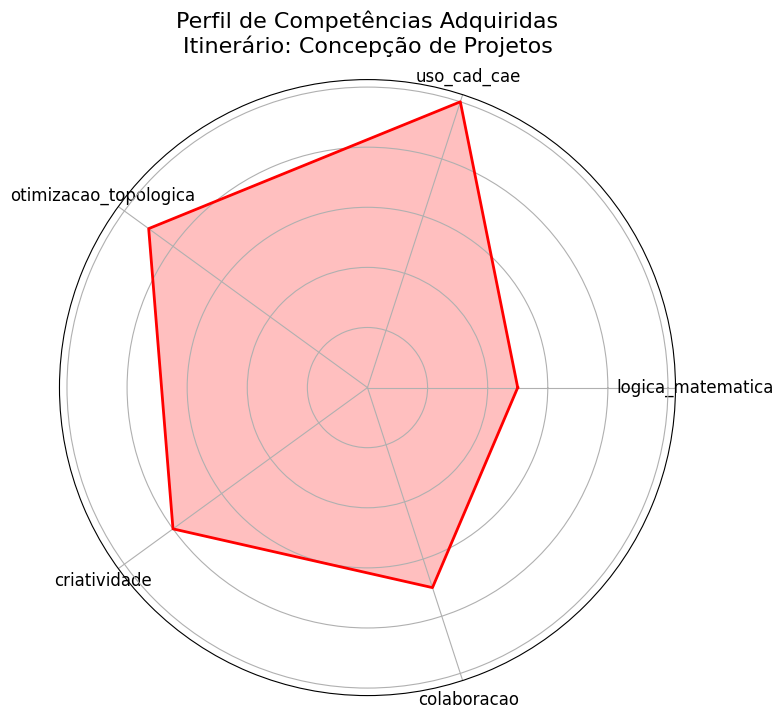

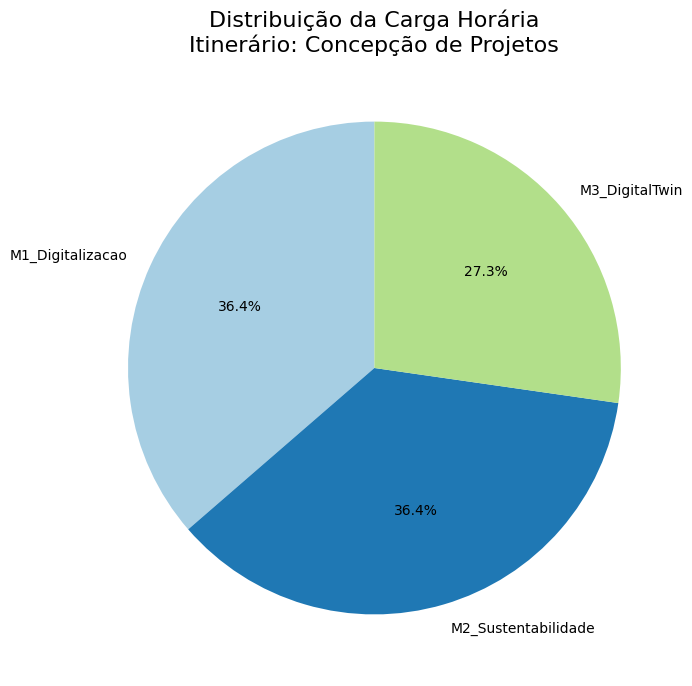


--- RESULTADOS PARA O ITINERÁRIO: Manufatura e Produção ---
Status: Optimal
Pontuação Máxima de Competências: 39.00

Módulos Selecionados:
- M1_Robotica: 50 horas
- M2_Manutencao_Preditiva: 40 horas
- M3_Otimizacao_MILP: 30 horas

Competências Adquiridas (com pontuação):
- programacao_robotica: 9
- manutencao_preditiva: 9
- raciocinio_quantitativo: 8
- melhoria_continua: 6
- trabalho_em_equipe: 7
--------------------------------------------------



/usr/local/lib/python3.12/dist-packages/pulp/pulp.py:1489: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


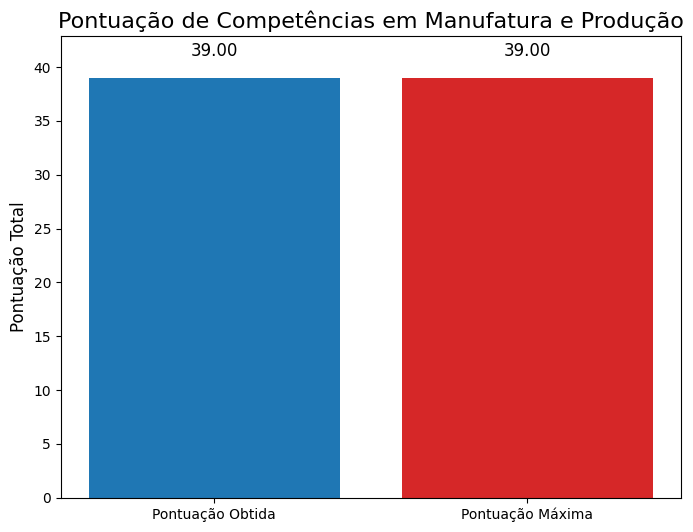

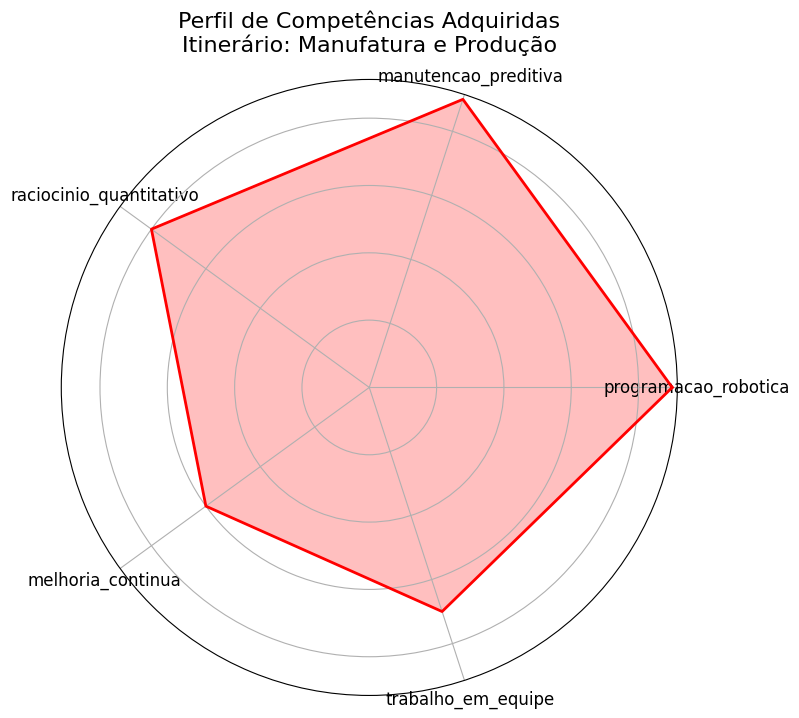

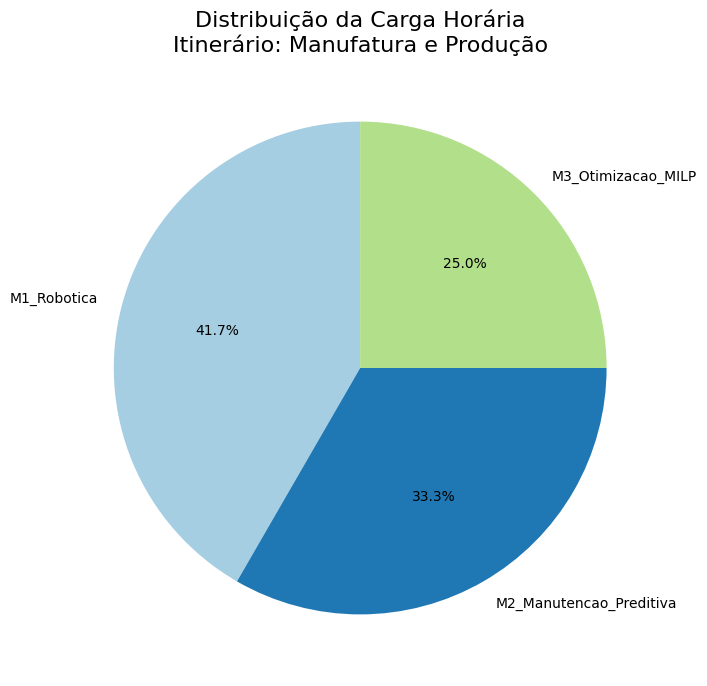


--- RESULTADOS PARA O ITINERÁRIO: Logística e Supply Chain ---
Status: Optimal
Pontuação Máxima de Competências: 42.00

Módulos Selecionados:
- M1_Rastreabilidade: 40 horas
- M2_Logistica_Reversa: 50 horas

Competências Adquiridas (com pontuação):
- raciocinio_quantitativo: 8
- analise_de_dados: 8
- uso_erp_blockchain: 10
- visao_sistemica: 9
- responsabilidade_social: 7
--------------------------------------------------



/usr/local/lib/python3.12/dist-packages/pulp/pulp.py:1489: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


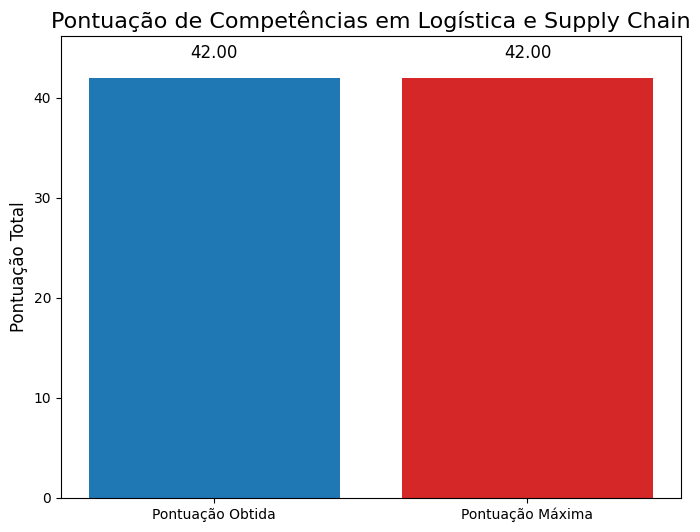

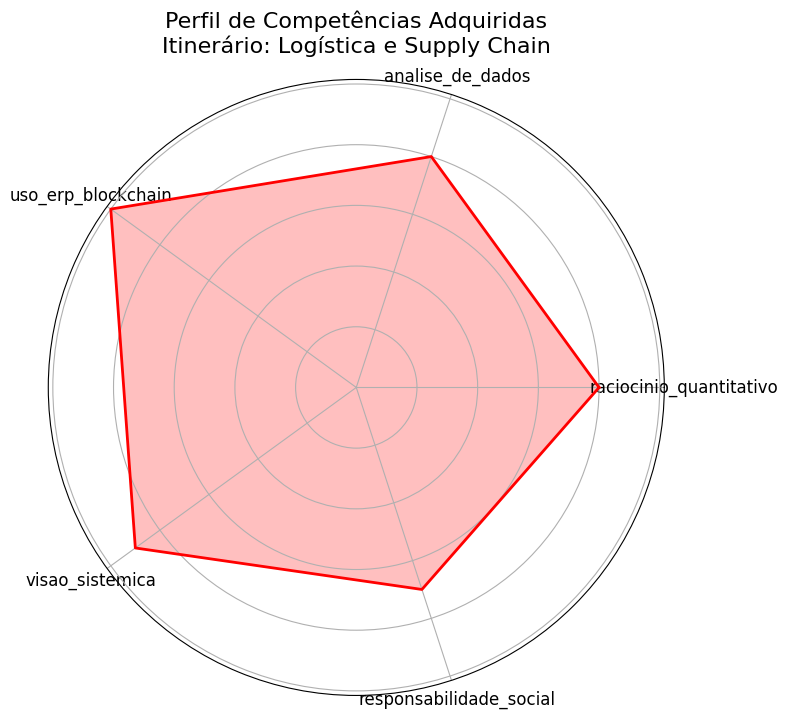

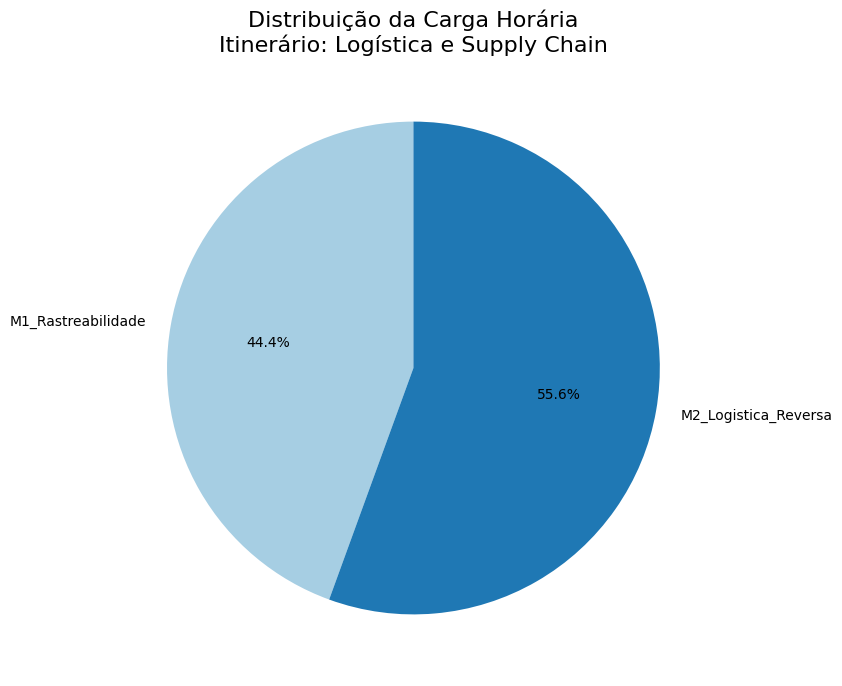


--- RESULTADOS PARA O ITINERÁRIO: Serviços e Pós-Venda ---
Status: Optimal
Pontuação Máxima de Competências: 35.00

Módulos Selecionados:
- M1_Alta_Tensao: 60 horas
- M2_Diagnostico_VAC: 50 horas

Competências Adquiridas (com pontuação):
- seguranca_eletrica: 10
- diagnostico_digital: 9
- atencao_concentrada: 8
- adaptabilidade: 8
--------------------------------------------------



/usr/local/lib/python3.12/dist-packages/pulp/pulp.py:1489: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


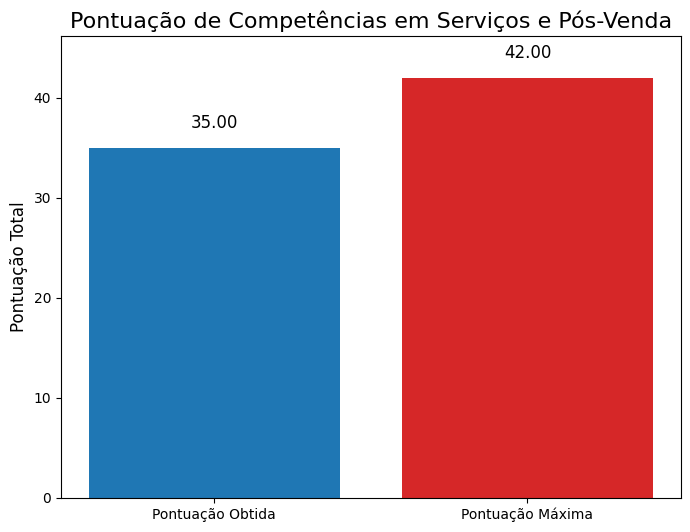

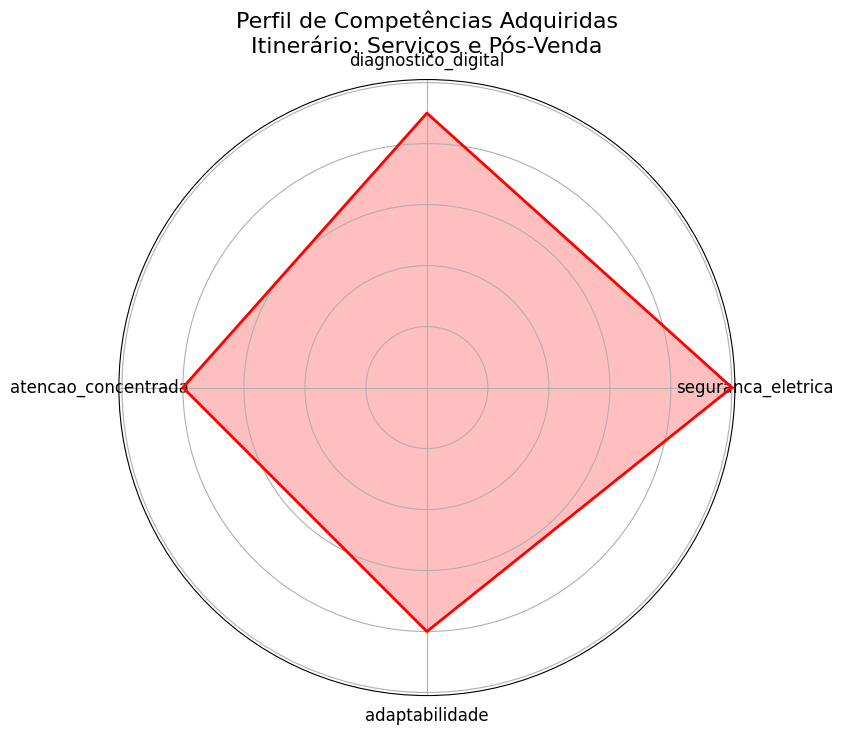

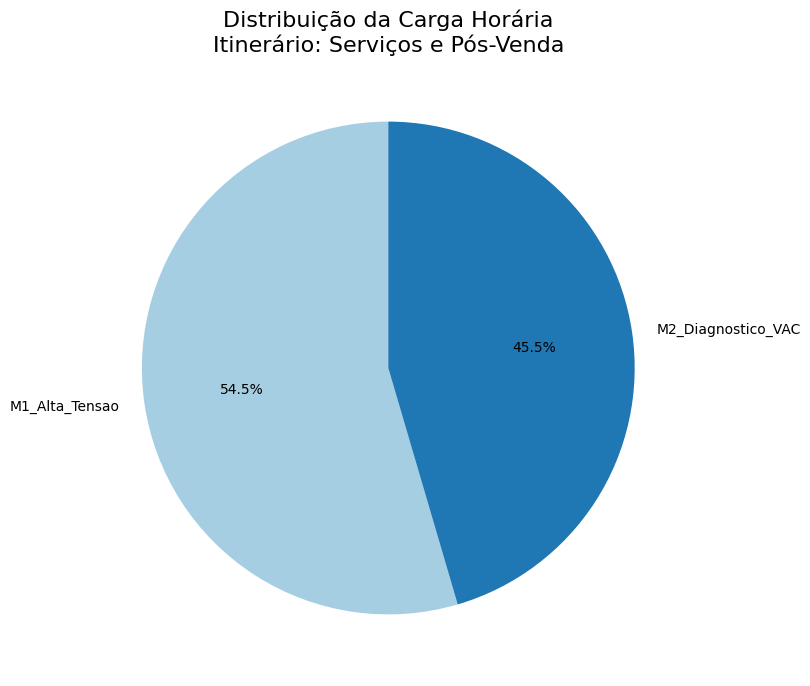


--- RESULTADOS PARA O ITINERÁRIO: Fim de Vida e Economia Circular ---
Status: Optimal
Pontuação Máxima de Competências: 44.00

Módulos Selecionados:
- M1_Desmontagem_Materiais: 40 horas
- M2_Reciclagem_Baterias: 60 horas

Competências Adquiridas (com pontuação):
- gestao_ambiental: 8
- reciclagem_materiais: 10
- consciencia_ambiental: 9
- resolucao_problemas_tecnicos: 9
- etica: 8
--------------------------------------------------



/usr/local/lib/python3.12/dist-packages/pulp/pulp.py:1489: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


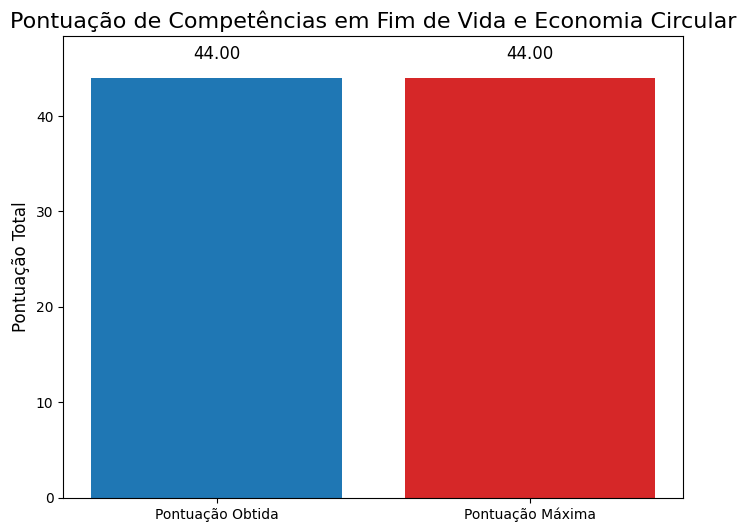

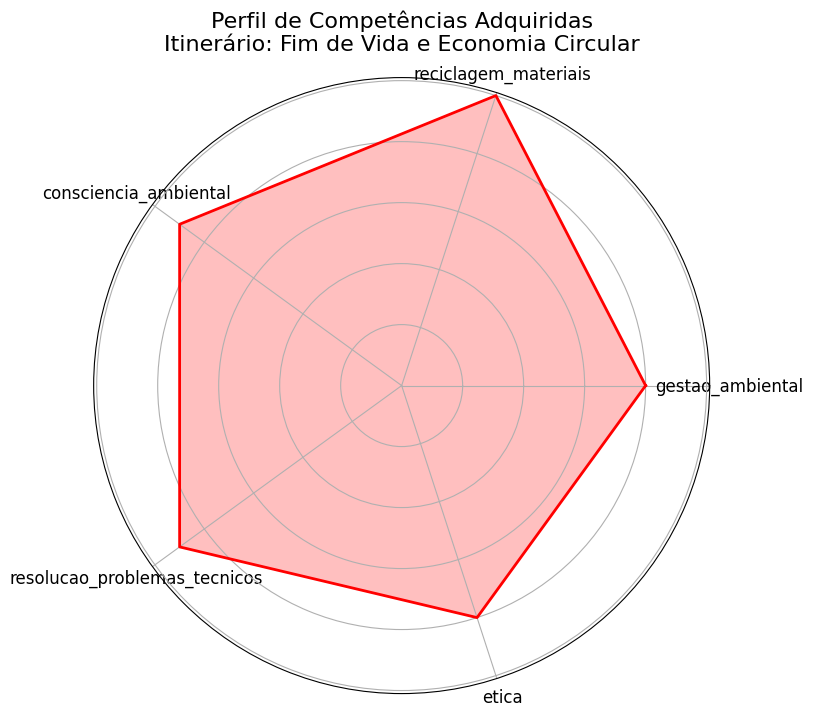

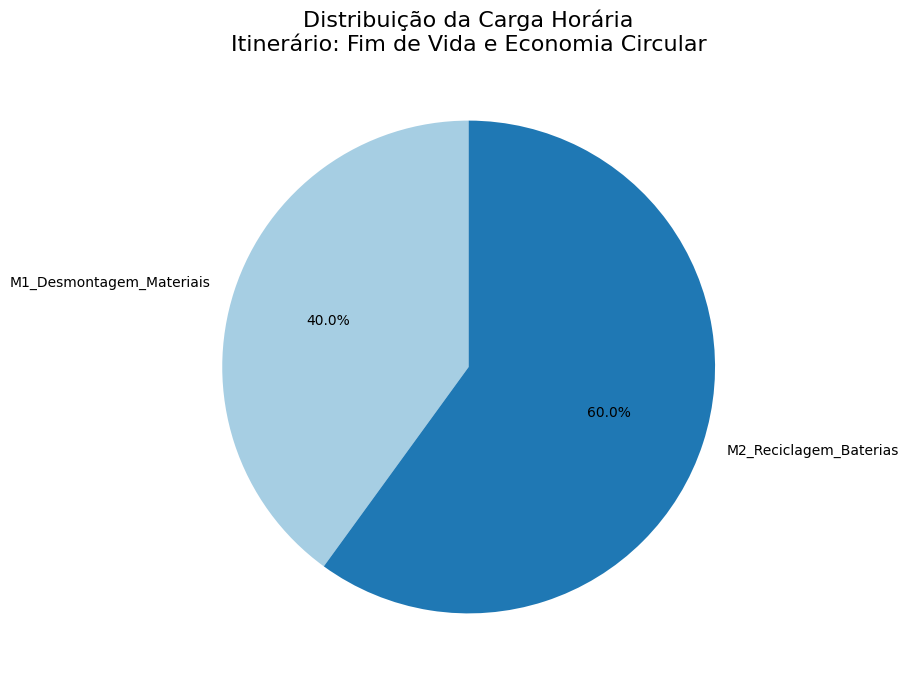

In [ ]:
!pip install pulp

import pulp as plp
import matplotlib.pyplot as plt
import numpy as np

# --- DADOS DO MODELO PARA CADA ITINERÁRIO ---

dados = {
    1: {  # Itinerário 1: Concepção de Projetos e Engenharia 4.0
        "nome": "Concepção de Projetos",
        "modulos": ["M1_Digitalizacao", "M2_Sustentabilidade", "M3_DigitalTwin"],
        "cargas_horarias": {"M1_Digitalizacao": 40, "M2_Sustentabilidade": 40, "M3_DigitalTwin": 30},
        "carga_horaria_max": 110,
        "competencias": ["logica_matematica", "uso_cad_cae", "otimizacao_topologica", "criatividade", "colaboracao"],
        "relevancia_competencias": {"logica_matematica": 5, "uso_cad_cae": 10, "otimizacao_topologica": 9, "criatividade": 8, "colaboracao": 7},
        "contribuicao_modulos": {
            "M1_Digitalizacao": {"logica_matematica": 0.8, "uso_cad_cae": 1.0, "otimizacao_topologica": 0.5, "criatividade": 0.7, "colaboracao": 0.5},
            "M2_Sustentabilidade": {"logica_matematica": 0.9, "uso_cad_cae": 0.6, "otimizacao_topologica": 0.8, "criatividade": 0.6, "colaboracao": 0.8},
            "M3_DigitalTwin": {"logica_matematica": 0.7, "uso_cad_cae": 0.7, "otimizacao_topologica": 0.4, "criatividade": 0.8, "colaboracao": 0.9}
        }
    },
    2: {  # Itinerário 2: Manufatura e Produção 4.0
        "nome": "Manufatura e Produção",
        "modulos": ["M1_Robotica", "M2_Manutencao_Preditiva", "M3_Otimizacao_MILP"],
        "cargas_horarias": {"M1_Robotica": 50, "M2_Manutencao_Preditiva": 40, "M3_Otimizacao_MILP": 30},
        "carga_horaria_max": 120,
        "competencias": ["programacao_robotica", "manutencao_preditiva", "raciocinio_quantitativo", "melhoria_continua", "trabalho_em_equipe"],
        "relevancia_competencias": {"programacao_robotica": 9, "manutencao_preditiva": 9, "raciocinio_quantitativo": 8, "melhoria_continua": 6, "trabalho_em_equipe": 7},
        "contribuicao_modulos": {
            "M1_Robotica": {"programacao_robotica": 1.0, "manutencao_preditiva": 0.3, "raciocinio_quantitativo": 0.7, "melhoria_continua": 0.5, "trabalho_em_equipe": 0.8},
            "M2_Manutencao_Preditiva": {"programacao_robotica": 0.2, "manutencao_preditiva": 1.0, "raciocinio_quantitativo": 0.9, "melhoria_continua": 0.9, "trabalho_em_equipe": 0.6},
            "M3_Otimizacao_MILP": {"programacao_robotica": 0.5, "manutencao_preditiva": 0.7, "raciocinio_quantitativo": 1.0, "melhoria_continua": 0.8, "trabalho_em_equipe": 0.7}
        }
    },
    3: {  # Itinerário 3: Logística e Supply Chain
        "nome": "Logística e Supply Chain",
        "modulos": ["M1_Rastreabilidade", "M2_Logistica_Reversa"],
        "cargas_horarias": {"M1_Rastreabilidade": 40, "M2_Logistica_Reversa": 50},
        "carga_horaria_max": 90,
        "competencias": ["raciocinio_quantitativo", "analise_de_dados", "uso_erp_blockchain", "visao_sistemica", "responsabilidade_social"],
        "relevancia_competencias": {"raciocinio_quantitativo": 8, "analise_de_dados": 8, "uso_erp_blockchain": 10, "visao_sistemica": 9, "responsabilidade_social": 7},
        "contribuicao_modulos": {
            "M1_Rastreabilidade": {"raciocinio_quantitativo": 0.7, "analise_de_dados": 0.8, "uso_erp_blockchain": 1.0, "visao_sistemica": 0.9, "responsabilidade_social": 0.6},
            "M2_Logistica_Reversa": {"raciocinio_quantitativo": 0.9, "analise_de_dados": 0.9, "uso_erp_blockchain": 0.7, "visao_sistemica": 1.0, "responsabilidade_social": 1.0}
        }
    },
    4: {  # Itinerário 4: Serviços e Pós-Venda em Veículos Eletrificados
        "nome": "Serviços e Pós-Venda",
        "modulos": ["M1_Alta_Tensao", "M2_Diagnostico_VAC"],
        "cargas_horarias": {"M1_Alta_Tensao": 60, "M2_Diagnostico_VAC": 50},
        "carga_horaria_max": 110,
        "competencias": ["seguranca_eletrica", "diagnostico_digital", "comunicacao_eficaz", "atencao_concentrada", "adaptabilidade"],
        "relevancia_competencias": {"seguranca_eletrica": 10, "diagnostico_digital": 9, "comunicacao_eficaz": 7, "atencao_concentrada": 8, "adaptabilidade": 8},
        "contribuicao_modulos": {
            "M1_Alta_Tensao": {"seguranca_eletrica": 1.0, "diagnostico_digital": 0.7, "comunicacao_eficaz": 0.5, "atencao_concentrada": 1.0, "adaptabilidade": 0.6},
            "M2_Diagnostico_VAC": {"seguranca_eletrica": 0.6, "diagnostico_digital": 1.0, "comunicacao_eficaz": 0.8, "atencao_concentrada": 0.7, "adaptabilidade": 1.0}
        }
    },
    5: {  # Itinerário 5: Fim de Vida e Economia Circular
        "nome": "Fim de Vida e Economia Circular",
        "modulos": ["M1_Desmontagem_Materiais", "M2_Reciclagem_Baterias"],
        "cargas_horarias": {"M1_Desmontagem_Materiais": 40, "M2_Reciclagem_Baterias": 60},
        "carga_horaria_max": 100,
        "competencias": ["gestao_ambiental", "reciclagem_materiais", "consciencia_ambiental", "resolucao_problemas_tecnicos", "etica"],
        "relevancia_competencias": {"gestao_ambiental": 8, "reciclagem_materiais": 10, "consciencia_ambiental": 9, "resolucao_problemas_tecnicos": 9, "etica": 8},
        "contribuicao_modulos": {
            "M1_Desmontagem_Materiais": {"gestao_ambiental": 0.9, "reciclagem_materiais": 0.7, "consciencia_ambiental": 1.0, "resolucao_problemas_tecnicos": 0.7, "etica": 0.8},
            "M2_Reciclagem_Baterias": {"gestao_ambiental": 0.8, "reciclagem_materiais": 1.0, "consciencia_ambiental": 0.9, "resolucao_problemas_tecnicos": 1.0, "etica": 0.9}
        }
    }
}

NIVEL_MINIMO_PROFICIENCIA = 1.5

def gerar_grafico_barras(nome_itinerario, pontuacao_obtida, pontuacao_maxima):
    labels = ['Pontuação Obtida', 'Pontuação Máxima']
    valores = [pontuacao_obtida, pontuacao_maxima]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, valores, color=['#1f77b4', '#d62728'])
    plt.title(f'Pontuação de Competências em {nome_itinerario}', fontsize=16)
    plt.ylabel('Pontuação Total', fontsize=12)
    plt.ylim(0, pontuacao_maxima * 1.1)

    for i, v in enumerate(valores):
        plt.text(i, v + 2, f'{v:.2f}', ha='center', fontsize=12)

    plt.show()

def gerar_grafico_radar(nome_itinerario, competencias_adquiridas, relevancia_competencias):
    competencias = list(competencias_adquiridas.keys())
    valores = [competencias_adquiridas[c] for c in competencias]

    angulos = np.linspace(0, 2 * np.pi, len(competencias), endpoint=False)
    valores = np.concatenate((valores, [valores[0]]))
    angulos = np.concatenate((angulos, [angulos[0]]))

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angulos, valores, color='red', alpha=0.25)
    ax.plot(angulos, valores, color='red', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angulos[:-1])
    ax.set_xticklabels(competencias, fontsize=12)
    ax.set_title(f'Perfil de Competências Adquiridas\nItinerário: {nome_itinerario}', fontsize=16, pad=20)
    plt.show()

def gerar_grafico_pizza(nome_itinerario, modulos_selecionados, cargas_horarias):
    modulos = [m for m, horas in modulos_selecionados.items() if horas > 0]
    horas = [cargas_horarias[m] for m in modulos]

    if not modulos:
        print("Nenhum módulo selecionado para gerar o gráfico de pizza.")
        return

    plt.figure(figsize=(8, 8))
    plt.pie(horas, labels=modulos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f'Distribuição da Carga Horária\nItinerário: {nome_itinerario}', fontsize=16)
    plt.show()


def otimizar_itinerario(itinerario_id):
    itinerario = dados[itinerario_id]
    nome_itinerario = itinerario["nome"]
    modulos = itinerario["modulos"]
    competencias = itinerario["competencias"]
    cargas_horarias = itinerario["cargas_horarias"]
    carga_horaria_max = itinerario["carga_horaria_max"]
    relevancia = itinerario["relevancia_competencias"]
    contribuicao = itinerario["contribuicao_modulos"]

    # 1. Criação do problema
    problema = plp.LpProblem(f"Otimizacao_{nome_itinerario}", plp.LpMaximize)

    # 2. Variáveis de decisão
    X = plp.LpVariable.dicts("Modulo", modulos, 0, 1, plp.LpBinary)
    Y = plp.LpVariable.dicts("Competencia", competencias, 0, 1, plp.LpBinary)

    # 3. Função Objetivo
    problema += plp.lpSum([relevancia[c] * Y[c] for c in competencias]), "Pontuacao Total de Competencias"

    # 4. Restrições
    # Restrição de Carga Horária Total
    problema += plp.lpSum([cargas_horarias[m] * X[m] for m in modulos]) <= carga_horaria_max, "Carga Horaria Total"

    # Restrição de Aquisição de Competência (Nível Mínimo de Proficiência)
    for c in competencias:
        problema += plp.lpSum([contribuicao[m][c] * X[m] for m in modulos]) >= Y[c] * NIVEL_MINIMO_PROFICIENCIA, f"Competencia_{c}_Adquirida"

    # Restrições de Pré-requisito (Exemplo para o Itinerário 2)
    if itinerario_id == 2:
        problema += X["M3_Otimizacao_MILP"] <= X["M1_Robotica"], "Pre-requisito_1"
        problema += X["M3_Otimizacao_MILP"] <= X["M2_Manutencao_Preditiva"], "Pre-requisito_2"

    # Solução do problema
    status = problema.solve()

    # Apresentação dos resultados textuais
    print(f"\n--- RESULTADOS PARA O ITINERÁRIO: {nome_itinerario} ---")
    print(f"Status: {plp.LpStatus[status]}")
    pontuacao_obtida = plp.value(problema.objective)
    print(f"Pontuação Máxima de Competências: {pontuacao_obtida:.2f}")

    modulos_selecionados = {}
    for m in modulos:
        if X[m].varValue == 1:
            modulos_selecionados[m] = cargas_horarias[m]

    print("\nMódulos Selecionados:")
    for m, horas in modulos_selecionados.items():
        print(f"- {m}: {horas} horas")

    competencias_adquiridas = {}
    for c in competencias:
        if Y[c].varValue == 1:
            competencias_adquiridas[c] = relevancia[c]

    print("\nCompetências Adquiridas (com pontuação):")
    for c, pontuacao in competencias_adquiridas.items():
        print(f"- {c}: {pontuacao}")

    print("--------------------------------------------------\n")

    # Geração dos gráficos
    pontuacao_maxima_teorica = sum(relevancia.values())
    gerar_grafico_barras(nome_itinerario, pontuacao_obtida, pontuacao_maxima_teorica)
    gerar_grafico_radar(nome_itinerario, competencias_adquiridas, relevancia)
    gerar_grafico_pizza(nome_itinerario, modulos_selecionados, cargas_horarias)


if __name__ == "__main__":
    for i in range(1, 6):
        otimizar_itinerario(i)

/usr/local/lib/python3.12/dist-packages/pulp/pulp.py:1489: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



--- RESULTADOS PARA O ITINERÁRIO: Concepção de Projetos ---
Status: Optimal
Pontuação Máxima de Capacidades: 39.00

Módulos Selecionados:
- M1_Digitalizacao: 40 horas
- M2_Sustentabilidade: 40 horas
- M3_DigitalTwin: 30 horas

Capacidades Adquiridas (com pontuação):
- logica_matematica: 5
- uso_cad_cae: 10
- otimizacao_topologica: 9
- criatividade: 8
- colaboracao: 7
--------------------------------------------------



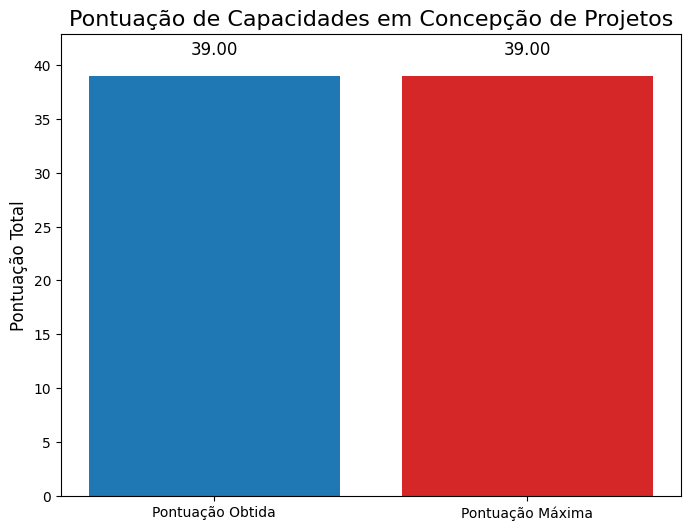

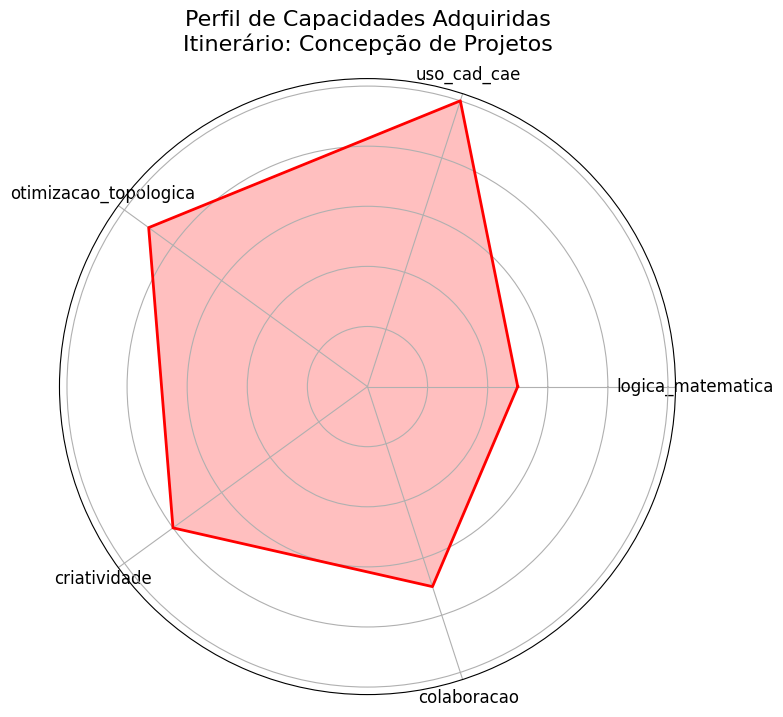

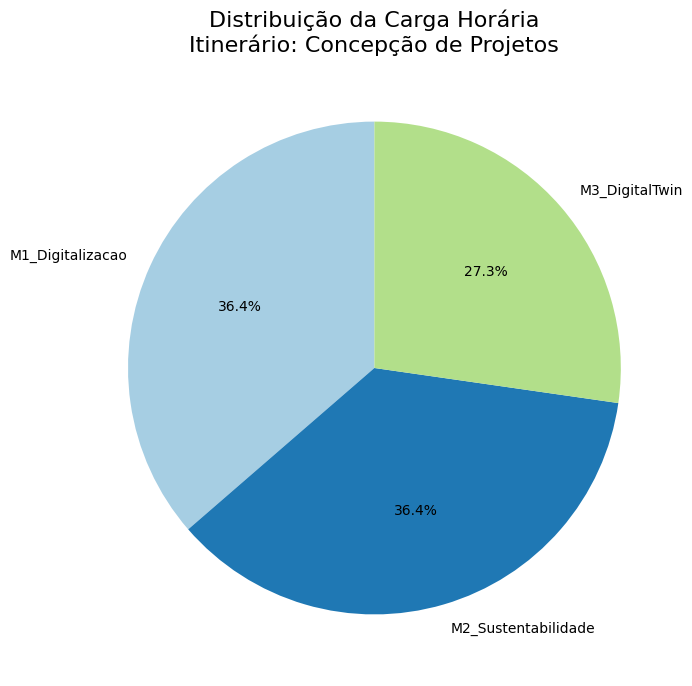

/usr/local/lib/python3.12/dist-packages/pulp/pulp.py:1489: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



--- RESULTADOS PARA O ITINERÁRIO: Manufatura e Produção ---
Status: Optimal
Pontuação Máxima de Capacidades: 39.00

Módulos Selecionados:
- M1_Robotica: 50 horas
- M2_Manutencao_Preditiva: 40 horas
- M3_Otimizacao_MILP: 30 horas

Capacidades Adquiridas (com pontuação):
- programacao_robotica: 9
- manutencao_preditiva: 9
- raciocinio_quantitativo: 8
- melhoria_continua: 6
- trabalho_em_equipe: 7
--------------------------------------------------



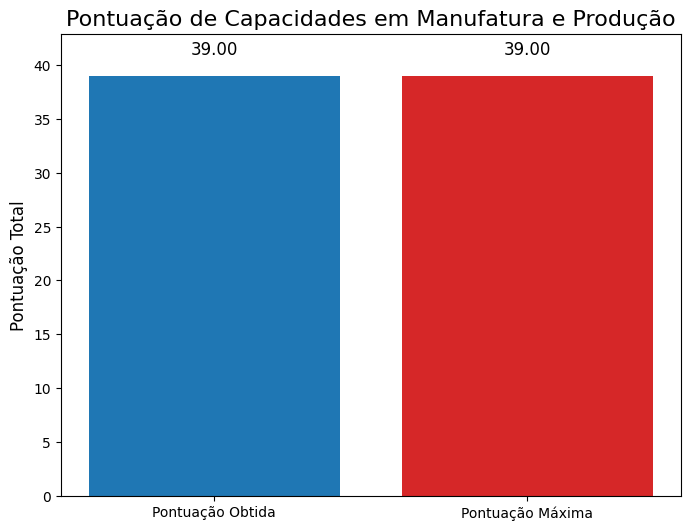

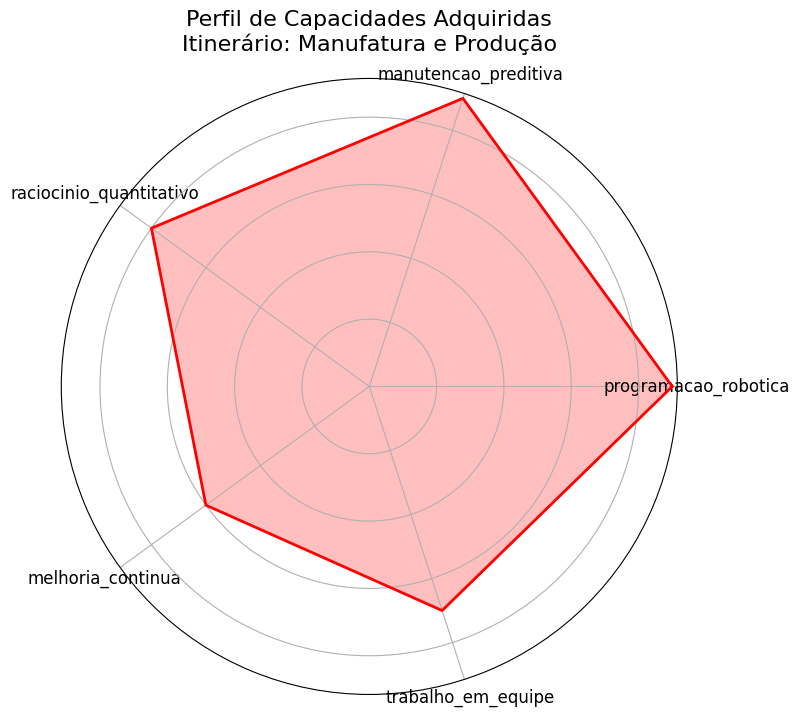

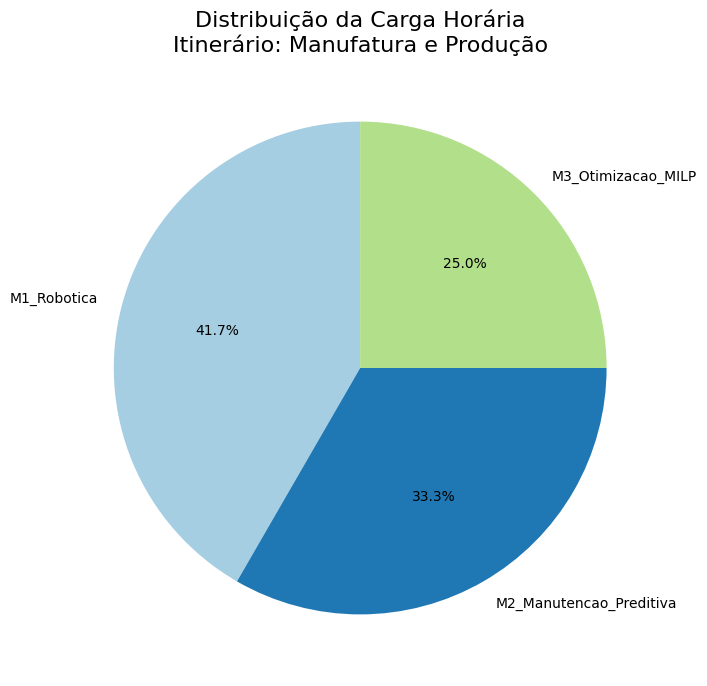


--- RESULTADOS PARA O ITINERÁRIO: Logística e Supply Chain ---
Status: Optimal
Pontuação Máxima de Capacidades: 42.00

Módulos Selecionados:
- M1_Rastreabilidade: 40 horas
- M2_Logistica_Reversa: 50 horas

Capacidades Adquiridas (com pontuação):
- raciocinio_quantitativo: 8
- analise_de_dados: 8
- uso_erp_blockchain: 10
- visao_sistemica: 9
- responsabilidade_social: 7
--------------------------------------------------



/usr/local/lib/python3.12/dist-packages/pulp/pulp.py:1489: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


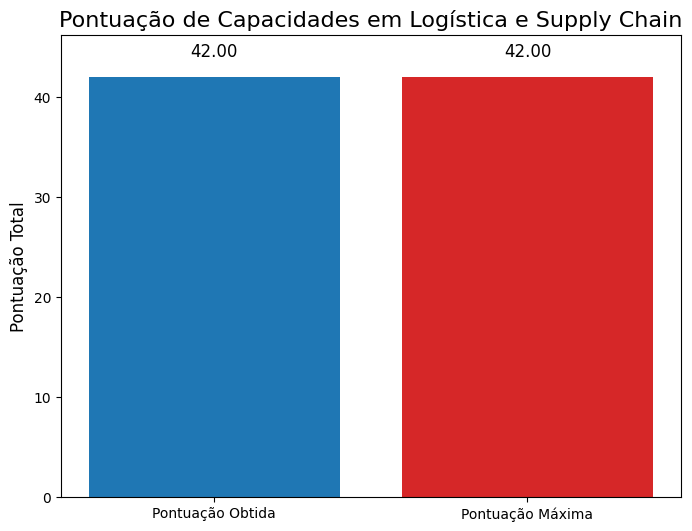

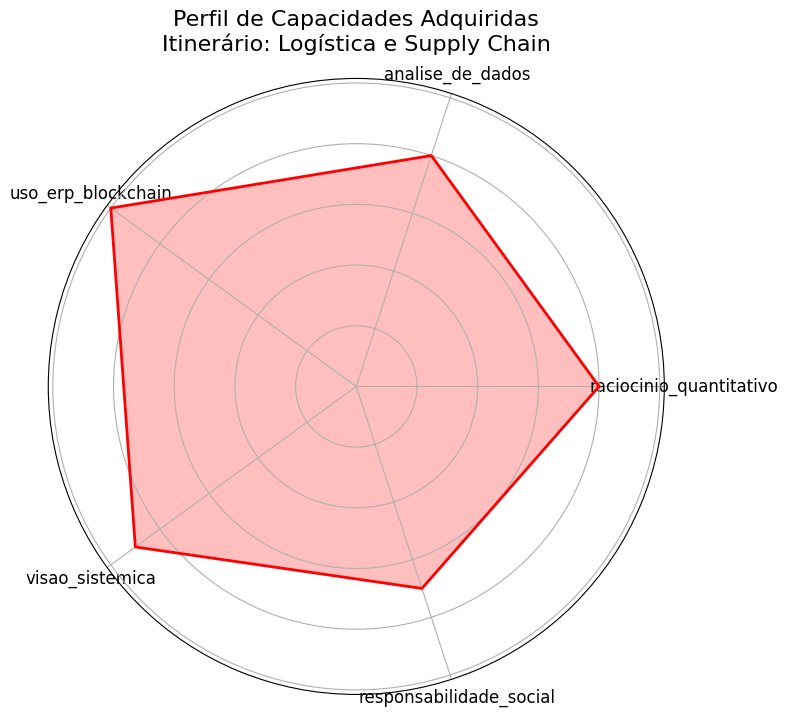

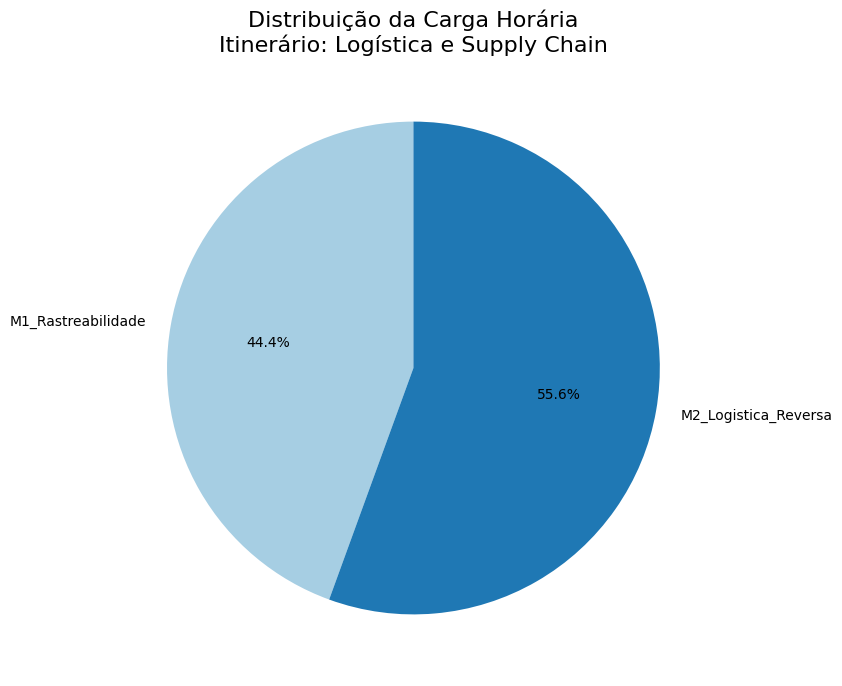


--- RESULTADOS PARA O ITINERÁRIO: Serviços e Pós-Venda ---
Status: Optimal
Pontuação Máxima de Capacidades: 35.00

Módulos Selecionados:
- M1_Alta_Tensao: 60 horas
- M2_Diagnostico_VAC: 50 horas

Capacidades Adquiridas (com pontuação):
- seguranca_eletrica: 10
- diagnostico_digital: 9
- atencao_concentrada: 8
- adaptabilidade: 8
--------------------------------------------------



/usr/local/lib/python3.12/dist-packages/pulp/pulp.py:1489: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


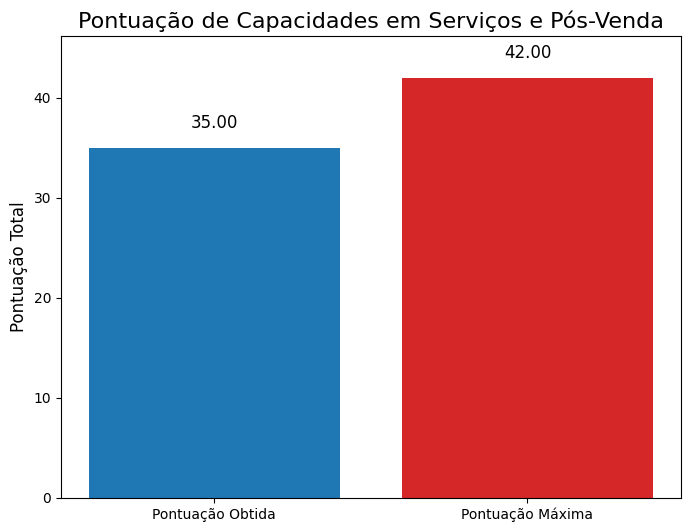

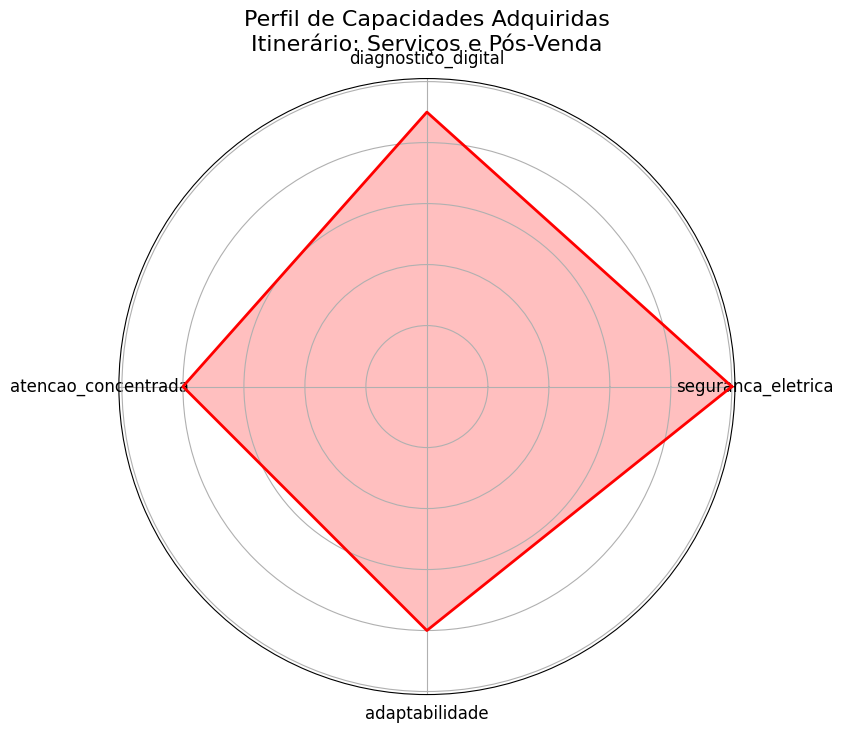

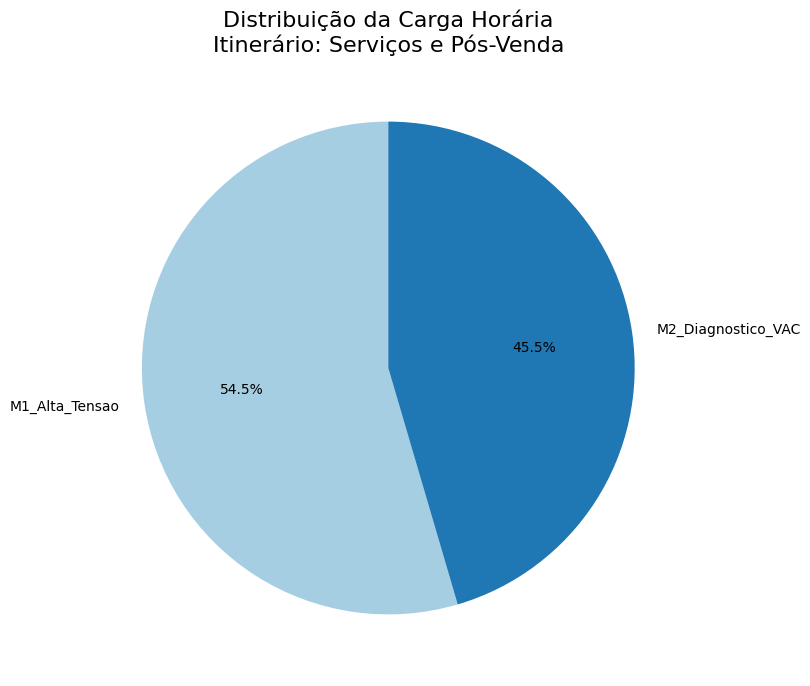


--- RESULTADOS PARA O ITINERÁRIO: Fim de Vida e Economia Circular ---
Status: Optimal
Pontuação Máxima de Capacidades: 44.00

Módulos Selecionados:
- M1_Desmontagem_Materiais: 40 horas
- M2_Reciclagem_Baterias: 60 horas

Capacidades Adquiridas (com pontuação):
- gestao_ambiental: 8
- reciclagem_materiais: 10
- consciencia_ambiental: 9
- resolucao_problemas_tecnicos: 9
- etica: 8
--------------------------------------------------



/usr/local/lib/python3.12/dist-packages/pulp/pulp.py:1489: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


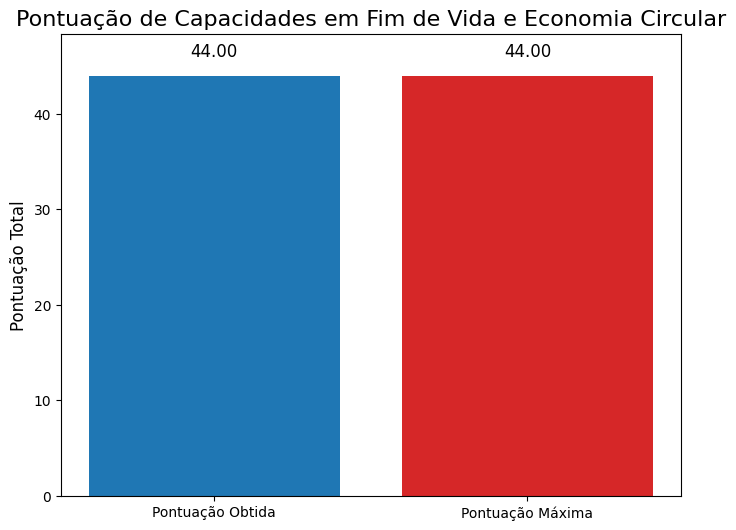

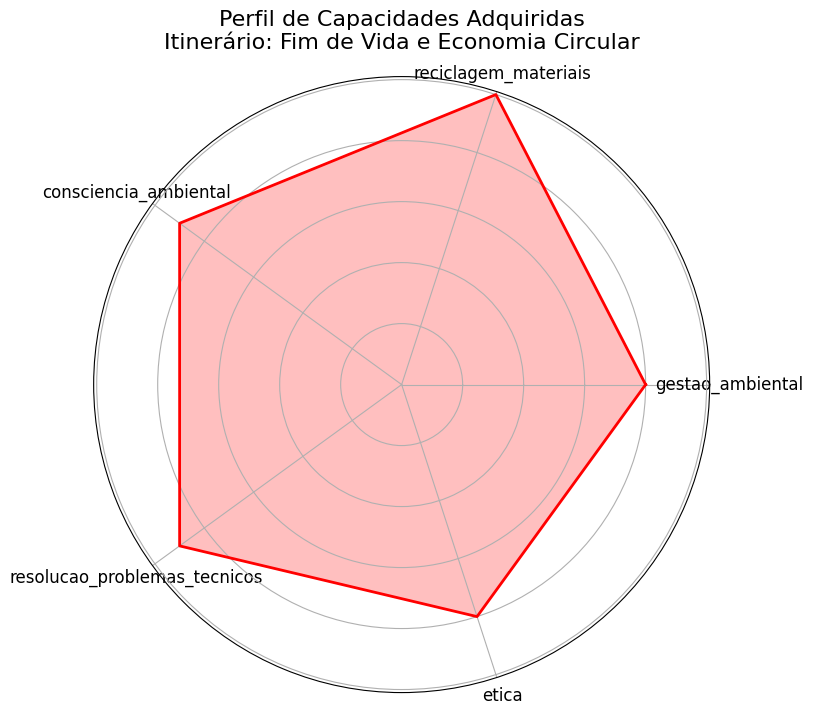

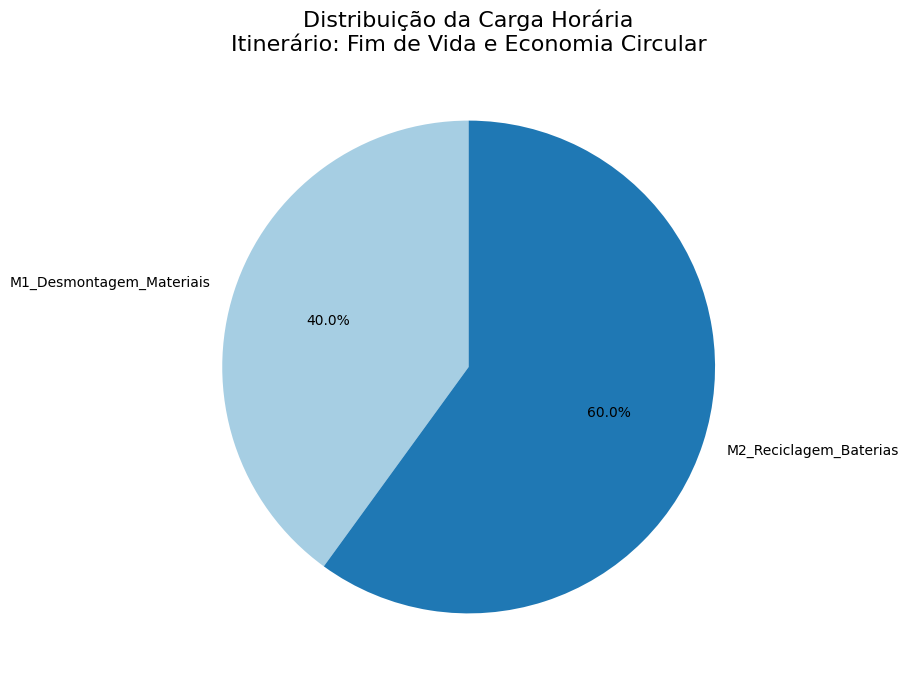

In [ ]:
!pip install pulp

import pulp as plp
import matplotlib.pyplot as plt
import numpy as np

# --- DADOS DO MODELO PARA CADA ITINERÁRIO ---

# As "competências" no código são, na verdade, as Capacidades do profissional.
# A Competência é o perfil completo que emerge da combinação dessas Capacidades.
dados = {
    1: {  # Itinerário 1: Concepção de Projetos e Engenharia 4.0
        "nome": "Concepção de Projetos",
        "modulos": ["M1_Digitalizacao", "M2_Sustentabilidade", "M3_DigitalTwin"],
        "cargas_horarias": {"M1_Digitalizacao": 40, "M2_Sustentabilidade": 40, "M3_DigitalTwin": 30},
        "carga_horaria_max": 110,
        "capacidades": ["logica_matematica", "uso_cad_cae", "otimizacao_topologica", "criatividade", "colaboracao"],
        "relevancia_capacidades": {"logica_matematica": 5, "uso_cad_cae": 10, "otimizacao_topologica": 9, "criatividade": 8, "colaboracao": 7},
        "contribuicao_modulos": {
            "M1_Digitalizacao": {"logica_matematica": 0.8, "uso_cad_cae": 1.0, "otimizacao_topologica": 0.5, "criatividade": 0.7, "colaboracao": 0.5},
            "M2_Sustentabilidade": {"logica_matematica": 0.9, "uso_cad_cae": 0.6, "otimizacao_topologica": 0.8, "criatividade": 0.6, "colaboracao": 0.8},
            "M3_DigitalTwin": {"logica_matematica": 0.7, "uso_cad_cae": 0.7, "otimizacao_topologica": 0.4, "criatividade": 0.8, "colaboracao": 0.9}
        }
    },
    2: {  # Itinerário 2: Manufatura e Produção 4.0
        "nome": "Manufatura e Produção",
        "modulos": ["M1_Robotica", "M2_Manutencao_Preditiva", "M3_Otimizacao_MILP"],
        "cargas_horarias": {"M1_Robotica": 50, "M2_Manutencao_Preditiva": 40, "M3_Otimizacao_MILP": 30},
        "carga_horaria_max": 120,
        "capacidades": ["programacao_robotica", "manutencao_preditiva", "raciocinio_quantitativo", "melhoria_continua", "trabalho_em_equipe"],
        "relevancia_capacidades": {"programacao_robotica": 9, "manutencao_preditiva": 9, "raciocinio_quantitativo": 8, "melhoria_continua": 6, "trabalho_em_equipe": 7},
        "contribuicao_modulos": {
            "M1_Robotica": {"programacao_robotica": 1.0, "manutencao_preditiva": 0.3, "raciocinio_quantitativo": 0.7, "melhoria_continua": 0.5, "trabalho_em_equipe": 0.8},
            "M2_Manutencao_Preditiva": {"programacao_robotica": 0.2, "manutencao_preditiva": 1.0, "raciocinio_quantitativo": 0.9, "melhoria_continua": 0.9, "trabalho_em_equipe": 0.6},
            "M3_Otimizacao_MILP": {"programacao_robotica": 0.5, "manutencao_preditiva": 0.7, "raciocinio_quantitativo": 1.0, "melhoria_continua": 0.8, "trabalho_em_equipe": 0.7}
        }
    },
    3: {  # Itinerário 3: Logística e Supply Chain
        "nome": "Logística e Supply Chain",
        "modulos": ["M1_Rastreabilidade", "M2_Logistica_Reversa"],
        "cargas_horarias": {"M1_Rastreabilidade": 40, "M2_Logistica_Reversa": 50},
        "carga_horaria_max": 90,
        "capacidades": ["raciocinio_quantitativo", "analise_de_dados", "uso_erp_blockchain", "visao_sistemica", "responsabilidade_social"],
        "relevancia_capacidades": {"raciocinio_quantitativo": 8, "analise_de_dados": 8, "uso_erp_blockchain": 10, "visao_sistemica": 9, "responsabilidade_social": 7},
        "contribuicao_modulos": {
            "M1_Rastreabilidade": {"raciocinio_quantitativo": 0.7, "analise_de_dados": 0.8, "uso_erp_blockchain": 1.0, "visao_sistemica": 0.9, "responsabilidade_social": 0.6},
            "M2_Logistica_Reversa": {"raciocinio_quantitativo": 0.9, "analise_de_dados": 0.9, "uso_erp_blockchain": 0.7, "visao_sistemica": 1.0, "responsabilidade_social": 1.0}
        }
    },
    4: {  # Itinerário 4: Serviços e Pós-Venda em Veículos Eletrificados
        "nome": "Serviços e Pós-Venda",
        "modulos": ["M1_Alta_Tensao", "M2_Diagnostico_VAC"],
        "cargas_horarias": {"M1_Alta_Tensao": 60, "M2_Diagnostico_VAC": 50},
        "carga_horaria_max": 110,
        "capacidades": ["seguranca_eletrica", "diagnostico_digital", "comunicacao_eficaz", "atencao_concentrada", "adaptabilidade"],
        "relevancia_capacidades": {"seguranca_eletrica": 10, "diagnostico_digital": 9, "comunicacao_eficaz": 7, "atencao_concentrada": 8, "adaptabilidade": 8},
        "contribuicao_modulos": {
            "M1_Alta_Tensao": {"seguranca_eletrica": 1.0, "diagnostico_digital": 0.7, "comunicacao_eficaz": 0.5, "atencao_concentrada": 1.0, "adaptabilidade": 0.6},
            "M2_Diagnostico_VAC": {"seguranca_eletrica": 0.6, "diagnostico_digital": 1.0, "comunicacao_eficaz": 0.8, "atencao_concentrada": 0.7, "adaptabilidade": 1.0}
        }
    },
    5: {  # Itinerário 5: Fim de Vida e Economia Circular
        "nome": "Fim de Vida e Economia Circular",
        "modulos": ["M1_Desmontagem_Materiais", "M2_Reciclagem_Baterias"],
        "cargas_horarias": {"M1_Desmontagem_Materiais": 40, "M2_Reciclagem_Baterias": 60},
        "carga_horaria_max": 100,
        "capacidades": ["gestao_ambiental", "reciclagem_materiais", "consciencia_ambiental", "resolucao_problemas_tecnicos", "etica"],
        "relevancia_capacidades": {"gestao_ambiental": 8, "reciclagem_materiais": 10, "consciencia_ambiental": 9, "resolucao_problemas_tecnicos": 9, "etica": 8},
        "contribuicao_modulos": {
            "M1_Desmontagem_Materiais": {"gestao_ambiental": 0.9, "reciclagem_materiais": 0.7, "consciencia_ambiental": 1.0, "resolucao_problemas_tecnicos": 0.7, "etica": 0.8},
            "M2_Reciclagem_Baterias": {"gestao_ambiental": 0.8, "reciclagem_materiais": 1.0, "consciencia_ambiental": 0.9, "resolucao_problemas_tecnicos": 1.0, "etica": 0.9}
        }
    }
}

NIVEL_MINIMO_PROFICIENCIA = 1.5

def gerar_grafico_barras(nome_itinerario, pontuacao_obtida, pontuacao_maxima):
    """
    Gera um gráfico de barras comparando a pontuação de capacidades obtida com a máxima possível.
    """
    labels = ['Pontuação Obtida', 'Pontuação Máxima']
    valores = [pontuacao_obtida, pontuacao_maxima]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, valores, color=['#1f77b4', '#d62728'])
    plt.title(f'Pontuação de Capacidades em {nome_itinerario}', fontsize=16)
    plt.ylabel('Pontuação Total', fontsize=12)
    plt.ylim(0, pontuacao_maxima * 1.1)

    for i, v in enumerate(valores):
        plt.text(i, v + 2, f'{v:.2f}', ha='center', fontsize=12)

    plt.show()

def gerar_grafico_radar(nome_itinerario, capacidades_adquiridas, relevancia_capacidades):
    """
    Gera um gráfico de radar para visualizar o perfil de capacidades adquiridas.
    """
    capacidades = list(capacidades_adquiridas.keys())
    valores = [capacidades_adquiridas[c] for c in capacidades]

    angulos = np.linspace(0, 2 * np.pi, len(capacidades), endpoint=False)
    valores = np.concatenate((valores, [valores[0]]))
    angulos = np.concatenate((angulos, [angulos[0]]))

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angulos, valores, color='red', alpha=0.25)
    ax.plot(angulos, valores, color='red', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angulos[:-1])
    ax.set_xticklabels(capacidades, fontsize=12)
    ax.set_title(f'Perfil de Capacidades Adquiridas\nItinerário: {nome_itinerario}', fontsize=16, pad=20)
    plt.show()

def gerar_grafico_pizza(nome_itinerario, modulos_selecionados, cargas_horarias):
    """
    Gera um gráfico de pizza para ilustrar a alocação de carga horária entre os módulos selecionados.
    """
    modulos = [m for m, horas in modulos_selecionados.items() if horas > 0]
    horas = [cargas_horarias[m] for m in modulos]

    if not modulos:
        print("Nenhum módulo selecionado para gerar o gráfico de pizza.")
        return

    plt.figure(figsize=(8, 8))
    plt.pie(horas, labels=modulos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f'Distribuição da Carga Horária\nItinerário: {nome_itinerario}', fontsize=16)
    plt.show()


def otimizar_itinerario(itinerario_id):
    itinerario = dados[itinerario_id]
    nome_itinerario = itinerario["nome"]
    modulos = itinerario["modulos"]
    capacidades = itinerario["capacidades"]
    cargas_horarias = itinerario["cargas_horarias"]
    carga_horaria_max = itinerario["carga_horaria_max"]
    relevancia = itinerario["relevancia_capacidades"]
    contribuicao = itinerario["contribuicao_modulos"]

    # 1. Criação do problema
    problema = plp.LpProblem(f"Otimizacao_{nome_itinerario}", plp.LpMaximize)

    # 2. Variáveis de decisão
    X = plp.LpVariable.dicts("Modulo", modulos, 0, 1, plp.LpBinary)
    Y = plp.LpVariable.dicts("Capacidade", capacidades, 0, 1, plp.LpBinary)

    # 3. Função Objetivo: Maximizar a pontuação total das capacidades adquiridas
    problema += plp.lpSum([relevancia[c] * Y[c] for c in capacidades]), "Pontuacao Total de Capacidades"

    # 4. Restrições
    # Restrição de Carga Horária Total
    problema += plp.lpSum([cargas_horarias[m] * X[m] for m in modulos]) <= carga_horaria_max, "Carga Horaria Total"

    # Restrição de Aquisição de Capacidade (Nível Mínimo de Proficiência)
    for c in capacidades:
        problema += plp.lpSum([contribuicao[m][c] * X[m] for m in modulos]) >= Y[c] * NIVEL_MINIMO_PROFICIENCIA, f"Capacidade_{c}_Adquirida"

    # Restrições de Pré-requisito (Exemplo para o Itinerário 2)
    if itinerario_id == 2:
        problema += X["M3_Otimizacao_MILP"] <= X["M1_Robotica"], "Pre-requisito_1"
        problema += X["M3_Otimizacao_MILP"] <= X["M2_Manutencao_Preditiva"], "Pre-requisito_2"

    # Solução do problema
    status = problema.solve()

    # Apresentação dos resultados textuais
    print(f"\n--- RESULTADOS PARA O ITINERÁRIO: {nome_itinerario} ---")
    print(f"Status: {plp.LpStatus[status]}")
    pontuacao_obtida = plp.value(problema.objective)
    print(f"Pontuação Máxima de Capacidades: {pontuacao_obtida:.2f}")

    modulos_selecionados = {}
    for m in modulos:
        if X[m].varValue == 1:
            modulos_selecionados[m] = cargas_horarias[m]

    print("\nMódulos Selecionados:")
    for m, horas in modulos_selecionados.items():
        print(f"- {m}: {horas} horas")

    capacidades_adquiridas = {}
    for c in capacidades:
        if Y[c].varValue == 1:
            capacidades_adquiridas[c] = relevancia[c]

    print("\nCapacidades Adquiridas (com pontuação):")
    for c, pontuacao in capacidades_adquiridas.items():
        print(f"- {c}: {pontuacao}")

    print("--------------------------------------------------\n")

    # Geração dos gráficos
    pontuacao_maxima_teorica = sum(relevancia.values())
    gerar_grafico_barras(nome_itinerario, pontuacao_obtida, pontuacao_maxima_teorica)
    gerar_grafico_radar(nome_itinerario, capacidades_adquiridas, relevancia)
    gerar_grafico_pizza(nome_itinerario, modulos_selecionados, cargas_horarias)


if __name__ == "__main__":
    for i in range(1, 6):
        otimizar_itinerario(i)

A otimização dos itinerários curriculares foi formulada como um problema de Programação Linear Inteira Mista (MILP) e implementada computacionalmente utilizando o ambiente Google Colab. Para a modelagem e solução do problema, empregou-se a biblioteca Python `pulp`, que permitiu a definição das variáveis de decisão binárias para a seleção de módulos e aquisição de capacidades, a formulação da função objetivo para maximizar a pontuação de capacidades adquiridas, e a inclusão das restrições de carga horária e nível mínimo de proficiência. Os recursos computacionais fornecidos pelo Google Colab foram utilizados para executar o modelo de otimização e obter os resultados para cada itinerário. Adicionalmente, as bibliotecas `matplotlib.pyplot` e `numpy` foram utilizadas para gerar visualizações gráficas dos resultados, incluindo gráficos de barras para comparação da pontuação obtida, gráficos de radar para o perfil de capacidades adquiridas e gráficos de pizza para a distribuição da carga horária.